In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize':(7, 5)})

In [2]:
from sklearn.datasets import *

data = load_wine()
d = pd.DataFrame(data=data.data, columns=data.feature_names)
d['class'] = load_wine(True)[1]

d.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
from sklearn.ensemble import ExtraTreesClassifier

columns_short = [
    'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols',
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity',  'hue',
    'od280/od315', 'proline']

# Build a classification task using 3 informative features
cols = [c for c in d.columns if c != 'class']
X = d[cols]
y = d['class']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, criterion='entropy', random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
tree_importances = np.array([tree.feature_importances_ for tree in forest.estimators_])
indices = np.argsort(importances)[::-1]

df_imp = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns = cols)

# Sort columns by importance
df_imp = df_imp[[cols[i] for i in indices.tolist()]]
df_imp.head()

,proline,flavanoids,od280/od315_of_diluted_wines,color_intensity,alcohol,hue,total_phenols,malic_acid,alcalinity_of_ash,proanthocyanins,magnesium,ash,nonflavanoid_phenols
0,0.112071,0.039913,0.074436,0.086414,0.123032,0.103275,0.156483,0.006029,0.059647,0.082955,0.086142,0.028452,0.041151
1,0.246635,0.151537,0.171585,0.122846,0.105073,0.029957,0.000000,0.011697,0.000000,0.001758,0.000000,0.017755,0.141158
2,0.082238,0.007171,0.262399,0.012943,0.285089,0.229543,0.001908,0.025876,0.007171,0.027586,0.031330,0.026746,0.000000
3,0.176494,0.240426,0.033743,0.349098,0.043060,0.021925,0.023411,0.007171,0.012943,0.048614,0.013534,0.008691,0.020890
4,0.111577,0.102269,0.067168,0.127659,0.108586,0.045641,0.294762,0.007171,0.004803,0.004169,0.049750,0.051816,0.024630


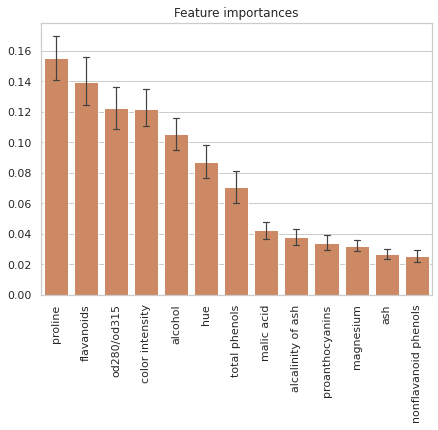

In [4]:
sns.set(style="whitegrid")
palette = sns.color_palette(n_colors=3)
fig = plt.figure()

ax = sns.barplot(data=df_imp, color=palette[1], capsize=.2, errwidth=1.2)
plt.title("Feature importances")
plt.xticks(range(X.shape[1]), [columns_short[i] for i in indices.tolist()], rotation='vertical')
plt.show()